# Tidy Finance With Python
## Chapter 3 Exercises

### Question 1

Select one of the data sources in the table above and retrieve some data. Browse the homepage of the data provider or the package documentation to find inspiration on which type of data is available to you and how to download the data into your Python session.

### Question 2

Generate summary statistics of the data you retrieved and provide some userful visualization. 

In [1]:
# We'll select fredapi
from fredapi import Fred
import json
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_text, labs, scale_color_manual, theme, element_text

In [2]:
# Load config file

with open('config.json') as config_file:
    config = json.load(config_file)

# Get API key
api_key = config['FRED_API_KEY']

# Initialize Fred
fred = Fred(api_key=api_key)

#### What is the unemployment rate in California?

In [3]:
#  Unemployment Rate in California See https://fred.stlouisfed.org/graph/?g=1taTq
unemployment_rate = fred.get_series('CAUR')

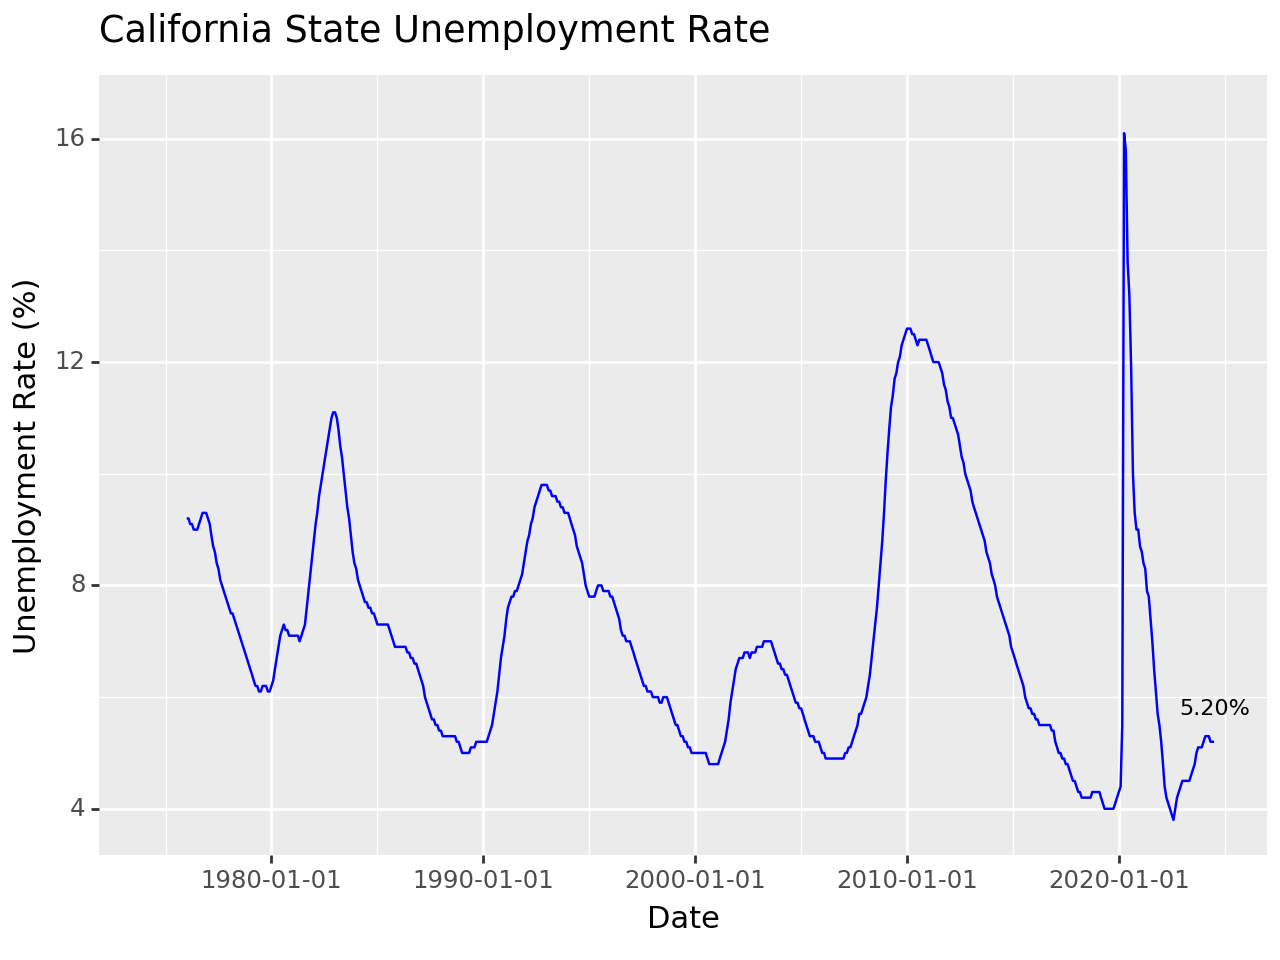

In [4]:
# Convert to a DataFrame to use with plotnine
unemployment_df = pd.DataFrame({
    'date': unemployment_rate.index,
    'rate': unemployment_rate.values
})

# Get the latest data point
latest_date = unemployment_df['date'].iloc[-1]
latest_value = unemployment_df['rate'].iloc[-1]

# Add a new column to the DataFrame for the label (only for the latest data point)
unemployment_df['label'] = ''
unemployment_df.loc[unemployment_df['date'] == latest_date, 'label'] = f'{latest_value:.2f}%'

# Create the plot with plotnine
unemployment_plot = (ggplot(unemployment_df, 
                            aes(x='date', y='rate')) +
                     geom_line(color='blue') +
                     geom_text(aes(label='label'),
                               ha='left',
                               va='bottom',
                               nudge_x=-600,
                               nudge_y=0.4,
                               size=8) +  # Add the label
                     labs(title='California State Unemployment Rate',
                          x='Date', 
                          y='Unemployment Rate (%)'
                         )
                    )

unemployment_plot.draw()

California's state unemployment rate is 5.2% as of the latest reading.

#### How is California’s wage growth compared to the national average?

In [5]:
# See Average Hourly Earnings of All Employees: Total Private in California https://fred.stlouisfed.org/graph/?g=1tJBK
wages_ca = fred.get_series('SMU06000000500000003') # California

In [6]:
# See Average Hourly Earnings of All Employees, Total Private https://fred.stlouisfed.org/graph/?g=1tJBL
wages_us = fred.get_series('CES0500000003') # U.S.

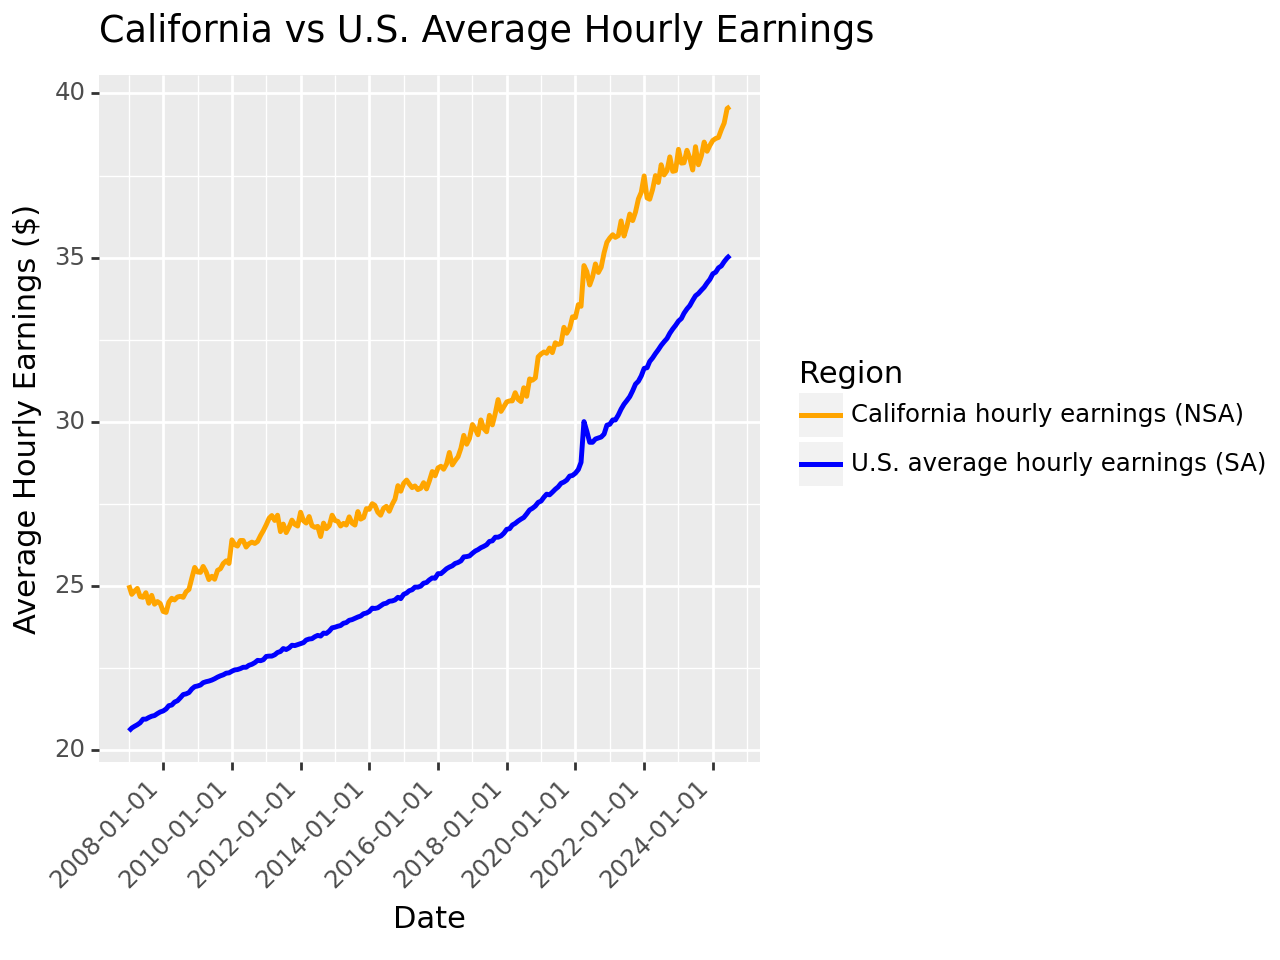

In [7]:
# Create a DataFrame with both series
wages_df = pd.DataFrame({
    'date': wages_ca.index,
    'wages_ca': wages_ca.values,
    'wages_us': wages_us.reindex(wages_ca.index).values  # Reindex to align the dates
})

# Melt the DataFrame for easier plotting
df_melted = wages_df.melt(id_vars=['date'], var_name='region', value_name='wages')

# Rename values in the 'region' column to more readable labels
df_melted['region'] = df_melted['region'].replace({'wages_ca': 'California hourly earnings (NSA)', 'wages_us': 'U.S. average hourly earnings (SA)'})

# Create the plot with plotnine
wages_plot = (ggplot(df_melted, aes(x='date', y='wages', color='region')) +
        geom_line(size=1) +
        labs(title="California vs U.S. Average Hourly Earnings",
             x="Date", y="Average Hourly Earnings ($)",
             color="Region") +
        scale_color_manual(values={"California hourly earnings (NSA)": "orange", "U.S. average hourly earnings (SA)": "blue"}) +  # Custom colors
        theme(axis_text_x=element_text(angle=45, hjust=1)))  # Slant x-axis labels


wages_plot.draw()

The California series is not seasonally adjusted, while the U.S. average series is. Cursory searches on FRED didn't bring up a consistent pair of series. If this were for more serious work, we would need to adjust these series to make them more directly comparable. Nonetheless, comparing these series does suggest that California hourly earnings are higher than the U.S. average.